Loaded sklearn breast cancer dataset with shape: (569, 30)

Feature preview:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Train shape: (455, 30), Test shape: (114, 30)

=== Evaluation (threshold = 0.5) ===
Accuracy : 0.9825
Precision: 0.9861
Recall   : 0.9861
F1 Score : 0.9861
ROC AUC  : 0.9957

Classification Report:
              precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114

Confusion Matrix (rows=actual, cols=predicted):
[[41  1]
 [ 1 71]]


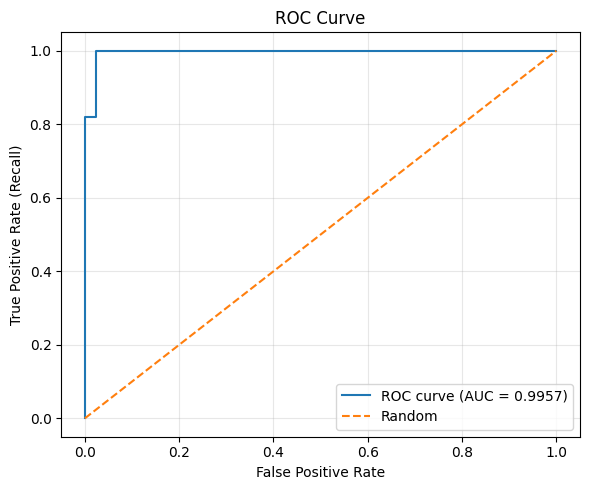


=== Metrics at different thresholds ===
thr=0.00 | acc=0.632 prec=0.632 rec=1.000 f1=0.774
thr=0.10 | acc=0.956 prec=0.935 rec=1.000 f1=0.966
thr=0.20 | acc=0.982 prec=0.973 rec=1.000 f1=0.986
thr=0.30 | acc=0.982 prec=0.973 rec=1.000 f1=0.986
thr=0.40 | acc=0.982 prec=0.986 rec=0.986 f1=0.986
thr=0.50 | acc=0.982 prec=0.986 rec=0.986 f1=0.986
thr=0.60 | acc=0.956 prec=0.986 rec=0.944 f1=0.965
thr=0.70 | acc=0.939 prec=0.985 rec=0.917 f1=0.950
thr=0.80 | acc=0.939 prec=0.985 rec=0.917 f1=0.950
thr=0.90 | acc=0.886 prec=0.984 rec=0.833 f1=0.902
thr=1.00 | acc=0.368 prec=0.000 rec=0.000 f1=0.000


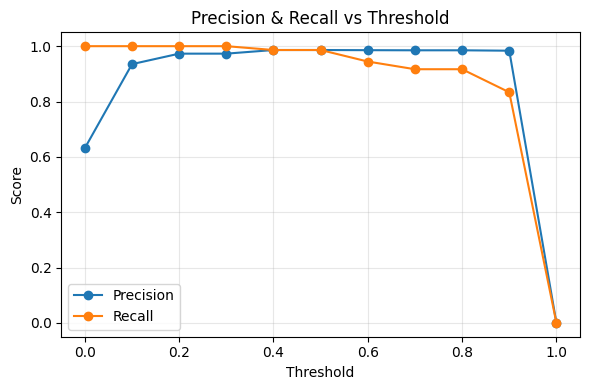


Top features by absolute coefficient:


,feature,coefficient
21,worst texture,-1.242272
10,radius error,-1.087929
23,worst area,-0.979282
13,area error,-0.958096
20,worst radius,-0.946000
27,worst concave points,-0.945296
28,worst symmetry,-0.928729
26,worst concavity,-0.827180
22,worst perimeter,-0.764807
24,worst smoothness,-0.759567


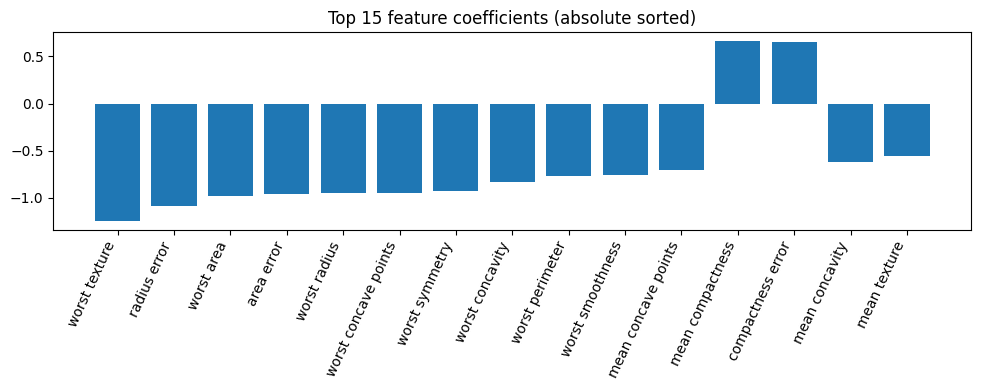


Logistic regression predicts the probability of the positive class by applying a sigmoid function
to a linear combination of features: sigmoid(z) = 1 / (1 + exp(-z)), where z = w^T x + b.
The sigmoid output ranges between 0 and 1 and is interpreted as P(y=1 | x).
To convert probabilities into class labels we choose a threshold (commonly 0.5):
- If P >= threshold -> predict positive (1)
- Else -> predict negative (0)

Changing the threshold trades off precision vs recall:
- Higher threshold -> fewer positives predicted -> typically higher precision, lower recall.
- Lower threshold -> more positives predicted -> typically higher recall, lower precision.


Saved 'threshold_metrics.csv' and 'logreg_coefficients.csv'


In [1]:
# Logistic Regression - Binary Classification (scikit-learn)
# Features:
# - Load dataset (sklearn or local CSV)
# - Train/test split
# - Standardize features
# - Fit LogisticRegression
# - Evaluate: confusion matrix, precision, recall, F1, ROC-AUC
# - Plot ROC curve and show how threshold affects predictions
# - Short explanation about sigmoid and thresholding

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
)

# === CONFIG ===
USE_LOCAL_CSV = False
LOCAL_CSV_PATH = "data.csv"   # set if USE_LOCAL_CSV True
TARGET_COLUMN = "target"      # name of target column in local CSV
RANDOM_STATE = 42
TEST_SIZE = 0.2

# === 1) Load data ===
if USE_LOCAL_CSV:
    df = pd.read_csv(LOCAL_CSV_PATH)
    if TARGET_COLUMN not in df.columns:
        raise ValueError(f"TARGET_COLUMN '{TARGET_COLUMN}' not found in CSV columns.")
    X = df.drop(columns=[TARGET_COLUMN])
    y = df[TARGET_COLUMN].values
    feature_names = X.columns.tolist()
    print("Loaded local CSV:", LOCAL_CSV_PATH)
else:
    data = load_breast_cancer(as_frame=True)
    X = data.data
    y = data.target
    feature_names = data.feature_names
    print("Loaded sklearn breast cancer dataset with shape:", X.shape)

print("\nFeature preview:")
display(X.head())

# === 2) Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)
print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")

# === 3) Standardize features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 4) Fit Logistic Regression ===
# solver='liblinear' is good for small datasets; C controls regularization strength (inverse)
model = LogisticRegression(solver='liblinear', C=1.0, random_state=RANDOM_STATE)
model.fit(X_train_scaled, y_train)

# === 5) Predictions & Probabilities ===
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # probability of positive class

# === 6) Basic evaluation (default threshold = 0.5) ===
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\n=== Evaluation (threshold = 0.5) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion Matrix (rows=actual, cols=predicted):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# === 7) ROC curve ===
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1],[0,1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# === 8) Threshold tuning (show effect of threshold on precision/recall) ===
def evaluate_at_threshold(thresh):
    y_pred_thresh = (y_proba >= thresh).astype(int)
    return {
        "threshold": thresh,
        "accuracy": accuracy_score(y_test, y_pred_thresh),
        "precision": precision_score(y_test, y_pred_thresh, zero_division=0),
        "recall": recall_score(y_test, y_pred_thresh, zero_division=0),
        "f1": f1_score(y_test, y_pred_thresh, zero_division=0),
        "confusion": confusion_matrix(y_test, y_pred_thresh)
    }

# Evaluate several thresholds and display
thresholds_to_check = np.linspace(0.0, 1.0, 11)
results = [evaluate_at_threshold(t) for t in thresholds_to_check]

print("\n=== Metrics at different thresholds ===")
for r in results:
    print(f"thr={r['threshold']:.2f} | acc={r['accuracy']:.3f} prec={r['precision']:.3f} rec={r['recall']:.3f} f1={r['f1']:.3f}")

# Optional: plot Precision-Recall tradeoff vs threshold
precisions = [r['precision'] for r in results]
recalls = [r['recall'] for r in results]

plt.figure(figsize=(6,4))
plt.plot(thresholds_to_check, precisions, marker='o', label='Precision')
plt.plot(thresholds_to_check, recalls, marker='o', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# === 9) Display coefficients (feature importance-ish for linear model) ===
coef = model.coef_[0]
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coef
}).sort_values(by="coefficient", key=lambda s: s.abs(), ascending=False)

print("\nTop features by absolute coefficient:")
display(coef_df.head(15))

plt.figure(figsize=(10,4))
plt.bar(coef_df['feature'].iloc[:15], coef_df['coefficient'].iloc[:15])
plt.xticks(rotation=65, ha='right')
plt.title('Top 15 feature coefficients (absolute sorted)')
plt.tight_layout()
plt.show()

# === 10) Quick explanation: Sigmoid & Thresholding ===
sigmoid_explanation = """
Logistic regression predicts the probability of the positive class by applying a sigmoid function
to a linear combination of features: sigmoid(z) = 1 / (1 + exp(-z)), where z = w^T x + b.
The sigmoid output ranges between 0 and 1 and is interpreted as P(y=1 | x).
To convert probabilities into class labels we choose a threshold (commonly 0.5):
- If P >= threshold -> predict positive (1)
- Else -> predict negative (0)

Changing the threshold trades off precision vs recall:
- Higher threshold -> fewer positives predicted -> typically higher precision, lower recall.
- Lower threshold -> more positives predicted -> typically higher recall, lower precision.
"""
print(sigmoid_explanation)

# === 11) Save useful outputs ===
pd.DataFrame(results).to_csv("threshold_metrics.csv", index=False)
coef_df.to_csv("logreg_coefficients.csv", index=False)
print("\nSaved 'threshold_metrics.csv' and 'logreg_coefficients.csv'")

# End of script
